<a href="https://colab.research.google.com/github/darshini458/Machine-Learningprojects/blob/main/Insurance_using_linar_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

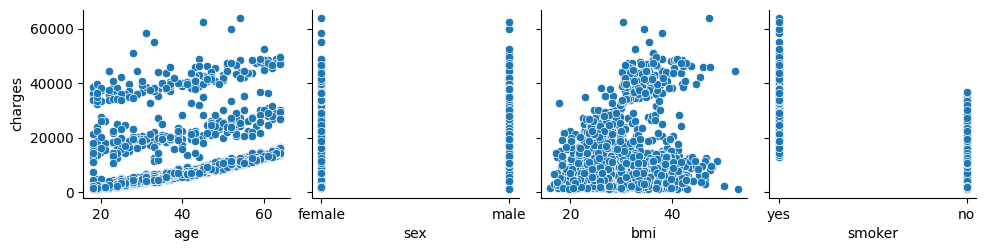

In [29]:
sns.pairplot(data=df[['age','sex','bmi','children','smoker','region','charges']],x_vars=['age','sex','bmi','smoker'],y_vars='charges',aspect=1)
plt.show()

In [34]:
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
lr=linear_model.LinearRegression()
x=df.iloc[:,:6]
y=df.iloc[:,6]
encoder=OneHotEncoder(handle_unknown='ignore')
encoded_features=encoder.fit_transform(x[['sex','smoker','region']]).toarray()
feature_names = encoder.get_feature_names_out(['sex', 'smoker', 'region'])
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

x = pd.concat([x, encoded_df], axis=1)
x = x.drop(['sex', 'smoker', 'region'], axis=1)
lr.fit(x,y)
x.columns = x.columns.astype(str)
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
print(coeff)

                   Coefficient
age                 256.856353
bmi                 339.193454
children            475.500545
sex_female           65.657180
sex_male            -65.657180
smoker_no        -11924.267271
smoker_yes        11924.267271
region_northeast    587.009235
region_northwest    234.045336
region_southeast   -448.012814
region_southwest   -373.041756


In [36]:
from sklearn import metrics
predictions=lr.predict(x)
Scores=pd.DataFrame({'Actual':y,'Predicted':predictions})
print(Scores)

           Actual     Predicted
0     16884.92400  25293.713028
1      1725.55230   3448.602834
2      4449.46200   6706.988491
3     21984.47061   3754.830163
4      3866.85520   5592.493386
...           ...           ...
1333  10600.54830  12351.323686
1334   2205.98080   3511.930809
1335   1629.83350   4149.132486
1336   2007.94500   1246.584939
1337  29141.36030  37085.623268

[1338 rows x 2 columns]


In [37]:
import numpy as np
print('RMSE:',np.sqrt(metrics.mean_squared_error(y,predictions)))
print('mean:',y.mean())
print('R-Squared:',metrics.r2_score(y,predictions))

RMSE: 6041.6796511744515
mean: 13270.422265141257
R-Squared: 0.7509130345985207
